1. Check Python Version

In [ ]:
!python -V

Python 3.9.16


2. Install pySentimiento

In [ ]:
!pip3 install pysentimiento

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 KB 23.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

3. Confirm instalation

In [ ]:
!pip show pysentimiento

Name: pysentimiento
Version: 0.6.1
Summary: A Transformer-based library for SocialNLP tasks
Home-page: https://github.com/pysentimiento/pysentimiento/
Author: Juan Manuel Pérez
Author-email: jmperez@dc.uba.ar
License: 
Location: /usr/local/lib/python3.9/dist-packages
Requires: datasets, emoji, spacy, torch, transformers
Required-by: 


4. Load File, Convert Column 'text' to class: 'pandas.core.frame.DataFrame'. Print Data 


In [ ]:
import pandas as pd
df = pd.read_csv('tweets.csv', encoding='latin1',sep=',', usecols=['text'])
df = df['text']

print(df)

0        RT @mrvelstan: literally nobody:\r\nme:\r\n\r\...
1        RT @agntecarter: im emotional, sorry!!\r\n\r\...
2        saving these bingo cards for tomorrow \r\n©\r\...
3        RT @HelloBoon: Man these #AvengersEndgame ads ...
4        RT @Marvel: We salute you, @ChrisEvans! #Capta...
                               ...                        
14995    RT @natsdany: First time                  Last...
14996    RT @MTVNEWS: The #AvengersEndgame cast has see...
14997    @SPICinemas kindly announce the approximate ti...
14998    RT @Marvel: We salute you, @ChrisEvans! #Capta...
14999    RT @Avengers: Welcome to the party, @RobertDow...
Name: text, Length: 15000, dtype: object


5. Import module, Initiat Analyzer, Append Tweets to a list


In [ ]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="es")

result = []
for i in df:
  a = analyzer.predict(i).output
  result.append(a)
# print(result)


6. View List

In [ ]:
print(result)

7. Calculate Positive, Negative nad Neutral Tweets

In [ ]:
pos = 0
neg = 0
neu = 0

for i in result:
  if i == "POS":
    pos += 1
  elif i == "NEU":
    neu += 1
  elif i == "NEG":
    neg += 1

print(f'The Positive Tweets are: {pos}\nThe Negative Tweets are: {neg}.\nThe Neutral Tweets are: {neu}.')


The Positive Tweets are: 4548
The Negative Tweets are: 2274.
The Neutral Tweets are: 8178.


8. Visualize the results in a Pie Chart with the help of the "metplotlib.pyplot" module.

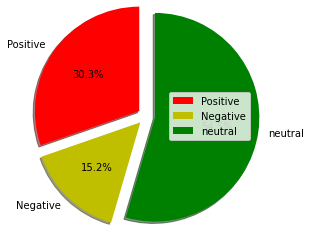

In [ ]:
import matplotlib.pyplot as plt

types = ['Positive', 'Negative', 'neutral']

# portion covered by each label
slices = [pos, neg, neu]
  
# color for each label
colors = ['r', 'y', 'g']

plt.pie(slices, labels = types, colors=colors, 
        startangle=90, shadow = True, explode = (0.1, 0.1, 0.1),
        radius = 1.2, autopct = '%1.1f%%')

plt.legend()
plt.show()